# Suicide Rates

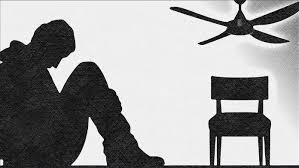

<br>

## Key facts regarding suicides
* Close to 800 000 people die due to suicide every year.
* For every suicide there are many more people who attempt suicide every year. A prior suicide attempt is the single most important risk factor for suicide in the general population.
* Suicide is the third leading cause of death in 15-19-year-olds.
* 79% of global suicides occur in low- and middle-income countries.
* Ingestion of pesticide, hanging and firearms are among the most common methods of suicide globally.

# Importing important libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.offline as offline
from plotly import tools
import plotly.figure_factory as ff
import plotly.express as px

In [ ]:
data=pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv")
data.head()

In [ ]:
data.describe()

In [ ]:
data.country.value_counts()[:5]

## A animation chart describing the number of suicides in top countries

In [ ]:
# don't parse dates while running this code
perc = data.loc[:,["year","country",'suicides_no']]
perc['total_suicides'] = perc.groupby([perc.country,perc.year])['suicides_no'].transform('sum')
perc.drop('suicides_no', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc[(perc['year']>=1990.0) & (perc['year']<=2012.0)]
perc = perc.sort_values("year",ascending = False)

top_countries = ['Mauritius','Austria','Iceland','Netherlands',"Republic of Korea"] 
perc = perc.loc[perc['country'].isin(top_countries)]
perc = perc.sort_values("year")
fig=px.bar(perc,x='country', y="total_suicides", animation_frame="year", 
           animation_group="country", color="country", hover_name="country")
fig.show()

 ## Pie chart describing age-group distribution of people commiting suicide

In [ ]:
data.age.value_counts().plot(kind='pie',shadow=True,startangle=90,explode=(0,0.1,0,0,.2,0),figsize=(15,10))

In [ ]:
data=pd.read_csv("../input/suicide-rates-overview-1985-to-2016/master.csv",parse_dates=["year"],index_col="year")
data.head()

In [ ]:
data['gdp_per_capita ($)'][:'2000'].plot(figsize=(15,10),legend=True,color='r')
data['gdp_per_capita ($)']['2000':].plot(figsize=(15,10),legend=True,color='g')
plt.legend(["Before 2000","After 2000"])